In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error

In [2]:
url = "https://raw.githubusercontent.com/edyoda/data-science-complete-tutorial/master/Data/house_rental_data.csv.txt"
data = pd.read_csv(url, index_col='Unnamed: 0')
print(data.head(), '\n')
print(data.info(), '\n')
print(data.describe(), '\n')

       Sqft  Floor  TotalFloor  Bedroom  Living.Room  Bathroom  Price
1  1177.698      2           7        2            2         2  62000
2  2134.800      5           7        4            2         2  78000
3  1138.560      5           7        2            2         1  58000
4  1458.780      2           7        3            2         2  45000
5   967.776     11          14        3            2         2  45000 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 645 entries, 1 to 648
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Sqft         645 non-null    float64
 1   Floor        645 non-null    int64  
 2   TotalFloor   645 non-null    int64  
 3   Bedroom      645 non-null    int64  
 4   Living.Room  645 non-null    int64  
 5   Bathroom     645 non-null    int64  
 6   Price        645 non-null    int64  
dtypes: float64(1), int64(6)
memory usage: 40.3 KB
None 

              Sqft       Floor  TotalF

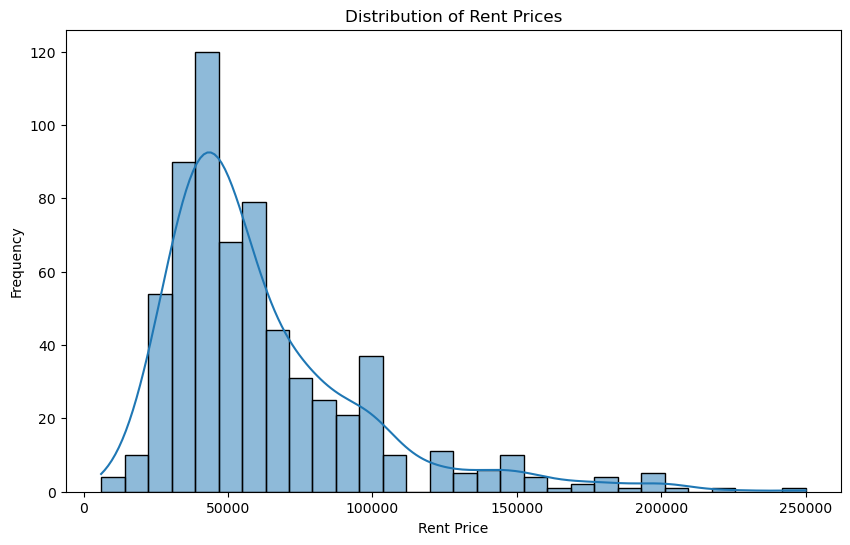

In [3]:
# Visualizing the distribution of prices
plt.figure(figsize=(10, 6))
sns.histplot(data['Price'], bins=30, kde=True)
plt.title('Distribution of Rent Prices')
plt.xlabel('Rent Price')
plt.ylabel('Frequency')
plt.show()

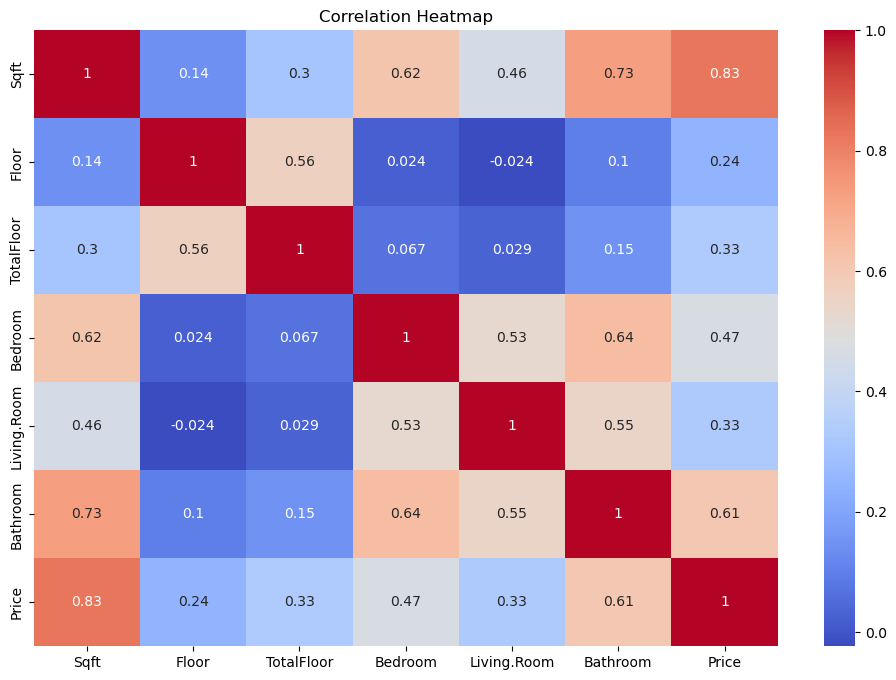

In [5]:
 #Visualizing the correlation between features and rent price
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [8]:
X = data.drop(['Price'], axis=1)
y = data['Price']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

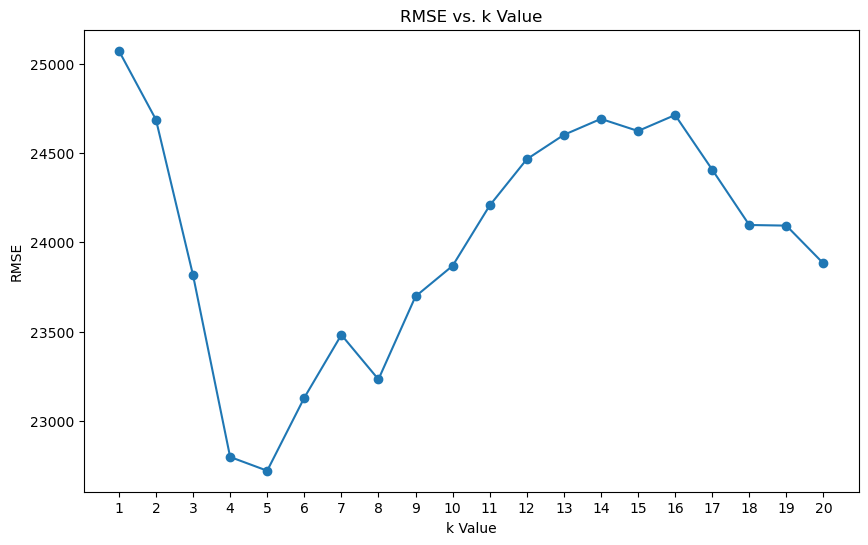


Best k: 5 with RMSE: 22720.541883686932


In [9]:
rmse_scores = []
best_rmse = float('inf')
best_k = 0
for k in range(1, 21):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    y_pred = knn.predict(X_test_scaled)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_scores.append(rmse)

    if rmse < best_rmse:
        best_rmse = rmse
        best_k = k

plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), rmse_scores, marker='o')
plt.title('RMSE vs. k Value')
plt.xlabel('k Value')
plt.ylabel('RMSE')
plt.xticks(range(1, 21))
plt.show()

print(f"\nBest k: {best_k} with RMSE: {best_rmse}")

In [10]:
final_model = KNeighborsRegressor(n_neighbors=best_k)
final_model.fit(X_train, y_train)

KNeighborsRegressor()